In [7]:
import numpy as np
import dedalus.public as d3
import logging
logger = logging.getLogger(__name__)
import copy
import h5py
import numpy as np
import matplotlib
import re

import matplotlib.pyplot as plt
from dedalus.extras import plot_tools

from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import Normalize

import os
from os import listdir

In [8]:
# Parameters
Lx, Lz = 20,1
Nx, Nz = 1280, 64
Ra_M = 1.0e7
M_0 = 0
M_H = -1


Prandtl = 1.0
stop_sim_time = 3000

nu = (Ra_M / (Prandtl*(M_0-M_H)*Lz**3))**(-1/2)

In [9]:
folder_dir = "analysis"

file_paths = [os.path.join(folder_dir, file) for file in listdir(folder_dir) if os.path.isfile(os.path.join(folder_dir, file)) and file.endswith('.h5')]
#sort by the number in the file name
file_paths.sort(key=lambda f: int(re.sub('\D', '', f)))
print(file_paths)

['analysis/analysis_s1.h5', 'analysis/analysis_s2.h5', 'analysis/analysis_s3.h5', 'analysis/analysis_s4.h5', 'analysis/analysis_s5.h5', 'analysis/analysis_s6.h5', 'analysis/analysis_s7.h5', 'analysis/analysis_s8.h5', 'analysis/analysis_s9.h5', 'analysis/analysis_s10.h5', 'analysis/analysis_s11.h5', 'analysis/analysis_s12.h5', 'analysis/analysis_s13.h5', 'analysis/analysis_s14.h5', 'analysis/analysis_s15.h5', 'analysis/analysis_s16.h5', 'analysis/analysis_s17.h5', 'analysis/analysis_s18.h5', 'analysis/analysis_s19.h5', 'analysis/analysis_s20.h5', 'analysis/analysis_s21.h5', 'analysis/analysis_s22.h5', 'analysis/analysis_s23.h5', 'analysis/analysis_s24.h5', 'analysis/analysis_s25.h5']


In [72]:
"""
DEBUGGING CONTROL GROUP
"""
folder_dir = "snapshots"

file_paths = [os.path.join(folder_dir, file) for file in listdir(folder_dir) if os.path.isfile(os.path.join(folder_dir, file)) and file.endswith('.h5')]
#sort by the number in the file name
file_paths.sort(key=lambda f: int(re.sub('\D', '', f)))
all_tot_ke = []

for file in file_paths:
    with h5py.File(file, mode='r') as file:
        uuyy = file['tasks']['uy']
        uuxz = file['tasks']['u']
        st = file['scales/sim_time']
        simtime = np.array(st)
        for t in range(0, len(simtime)):
            uuuyyy = np.transpose(uuyy[t, :, :])
            uuxz_trans = np.transpose(uuxz[t, :, :])
            print(np.average(uuuyyy), np.sum(np.square(uuuyyy)))
            print(np.average(uuxz_trans), np.sum(np.square(uuxz_trans)),np.max(uuxz_trans), np.min(uuxz_trans))
            uxxuzz = np.ndarray.tolist(uuxz_trans)
            for lay_1 in range(len(uuxz_trans)):
                for lay_2 in range(len(uuxz_trans[lay_1])):
                    modulus = np.linalg.norm(uuxz_trans[lay_1][lay_2])
                    uxxuzz[lay_1][lay_2] = modulus
            to_plot = np.square(uuuyyy)+np.square(uxxuzz)
            all_tot_ke.append(np.sum(to_plot))
            if t == 8:
                break
        print(len(all_tot_ke))
        print(np.max(all_tot_ke))
#print(all_tot_ke[])

0.0 0.0
0.0 0.0 0.0 0.0
1.189696936266817e-14 1.2112716952583467e-10
-6.532371473039913e-13 7.89647024033873e-06 5.496598370571843e-05 -6.102369726305601e-05
5.822887854498567e-14 5.375893597787984e-10
-1.7196006462479922e-12 1.3256331690509631e-05 7.274158115010029e-05 -8.021752010343457e-05
1.4428029539616534e-13 2.200055827882663e-09
-2.5451502218007276e-12 2.166274393036415e-05 9.142541626632307e-05 -9.95168828780624e-05
2.0242613498858774e-13 5.832076508907299e-09
-2.532646111342719e-12 3.089225197532328e-05 0.00010278655580413403 -0.00011337682725867022
2.2731673489048422e-13 1.0279625143376822e-08
-2.2654137585429552e-12 3.843228824646293e-05 0.00011978121515946916 -0.00012082006318731652
2.407084312832875e-13 1.670436423727539e-08
-1.874992211919973e-12 4.688140457347343e-05 0.00013844309322876306 -0.00012632441239626702
2.4340421136939643e-13 2.559258462243221e-08
-1.4020952347394868e-12 5.656487772927449e-05 0.00015926487108983663 -0.00013046127820957572
2.2691068524208108e-1

KeyboardInterrupt: 

In [10]:
"""
TOTAL KE
"""

all_tot_ke = []

for file in file_paths:
    with h5py.File(file, mode='r') as file:
        tot_ke = file['tasks']['total kinetic energy']
        st = file['scales/sim_time']
        simtime = np.array(st)
        for t in range(0, len(simtime)):
            all_tot_ke.append(np.sum(tot_ke[t]))
print(all_tot_ke[:10])
print(max(all_tot_ke))
"""
mean KE
"""
all_mean_ke = []

for file in file_paths:
    with h5py.File(file, mode='r') as file:
        mean_ke = file['tasks']['mean kinetic energy']
        st = file['scales/sim_time']
        simtime = np.array(st)
        for t in range(0, len(simtime)):
            all_mean_ke.append(np.average(mean_ke[t]))

[0.0, 4.18261292826093e-10, 9.095208333362398e-10, 1.380350367452796e-09, 1.8467154762728087e-09, 2.7891426910214758e-09, 3.272552565113712e-09, 3.767849365266867e-09, 4.27734821847606e-09, 4.803697443981246e-09]
0.338571624740267


24662
24662


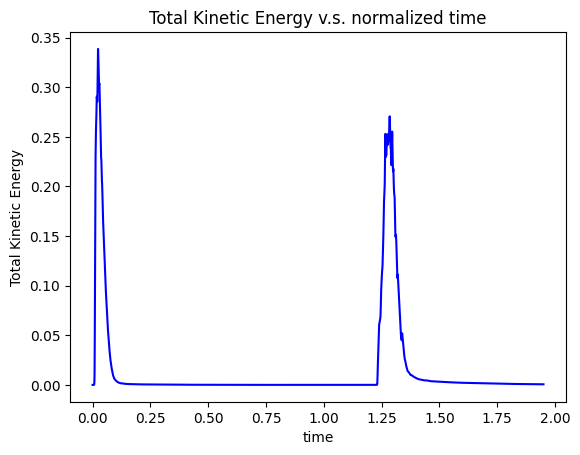

/state/partition1/job-40422946/ipykernel_3584959/1929320479.py:11: RuntimeWarning: divide by zero encountered in log
  plt.plot(figure_x_axis, np.log(all_tot_ke), color = 'blue')


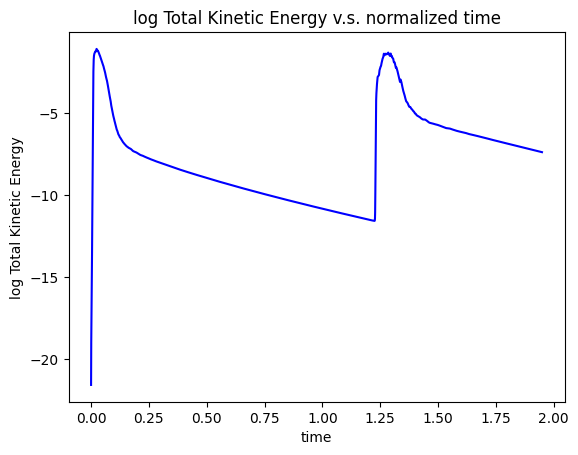

24662
24662


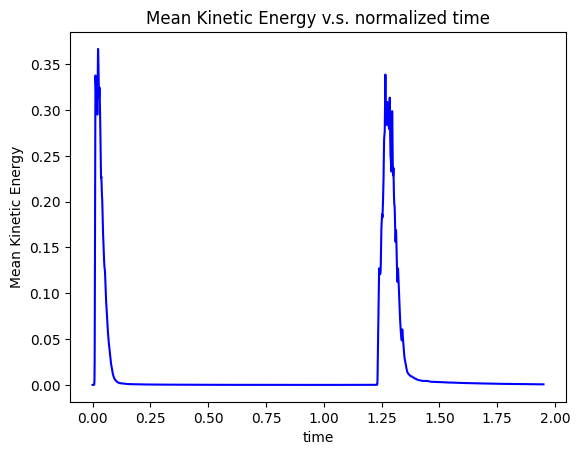

/state/partition1/job-40422946/ipykernel_3584959/1929320479.py:26: RuntimeWarning: divide by zero encountered in log
  plt.plot(figure_x_axis, np.log(all_mean_ke), color = 'blue')


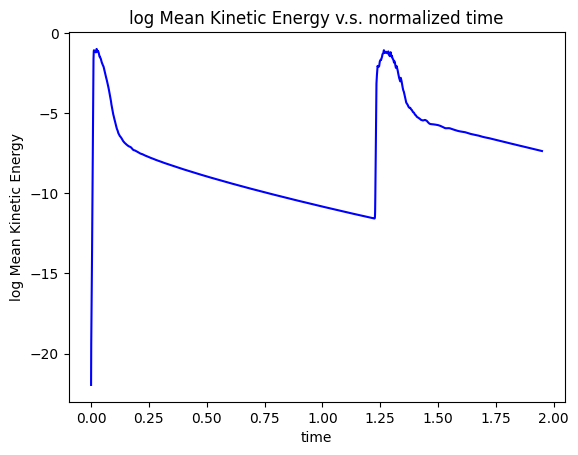

In [11]:
print(len(all_tot_ke))
figure_x_axis = np.array([(x*nu/(2**2)) for x in range(1, len(all_tot_ke)+1)])
print(len(figure_x_axis))
plt.plot(figure_x_axis, all_tot_ke, color = 'blue')
plt.xlabel('time')
plt.ylabel('Total Kinetic Energy')
plt.title('Total Kinetic Energy v.s. normalized time')
plt.show()
plt.clf()
figure_x_axis = np.array([(x*nu/(2**2)) for x in range(1, len(all_tot_ke)+1)])
plt.plot(figure_x_axis, np.log(all_tot_ke), color = 'blue')
plt.xlabel('time')
plt.ylabel('log Total Kinetic Energy')
plt.title('log Total Kinetic Energy v.s. normalized time')
plt.show()
plt.clf()
print(len(all_mean_ke))
figure_x_axis = np.array([(x*nu/(2**2)) for x in range(1, len(all_mean_ke)+1)])
print(len(figure_x_axis))
plt.plot(figure_x_axis, all_mean_ke, color = 'blue')
plt.xlabel('time')
plt.ylabel('Mean Kinetic Energy')
plt.title('Mean Kinetic Energy v.s. normalized time')
plt.show()
plt.clf()
plt.plot(figure_x_axis, np.log(all_mean_ke), color = 'blue')
plt.xlabel('time')
plt.ylabel('log Mean Kinetic Energy')
plt.title('log Mean Kinetic Energy v.s. normalized time')
plt.show()

In [6]:
figure_x_axis = np.array([(x*nu/(2**2)/4) for x in range(1, len(all_tot_uz)+1)])
print(len(figure_x_axis))
plt.plot(figure_x_axis, all_tot_uz, color = 'blue')
plt.xlabel('time')
plt.ylabel('Mean z')
plt.title('Mean z v.s. normalized time')
plt.show()

NameError: name 'all_tot_uz' is not defined

8000
8000


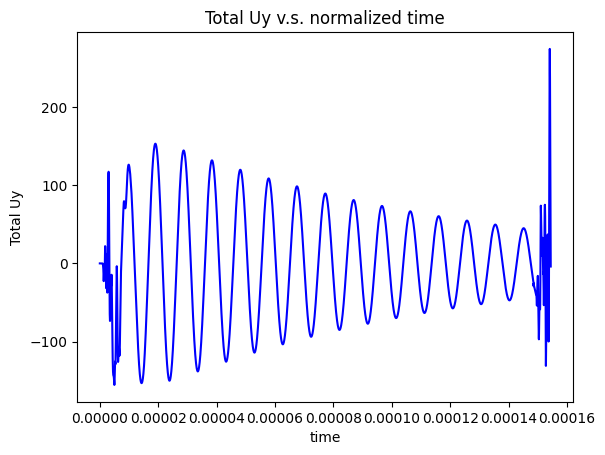

In [5]:
"""
VERY OLD
"""
print(len(all_tot_uy))
figure_x_axis = np.array([(x*nu/(Nz**2)/4) for x in range(1, len(all_tot_uy)+1)])
print(len(figure_x_axis))
plt.plot(figure_x_axis, all_tot_uy, color = 'blue')
plt.xlabel('time')
plt.ylabel('Total Uy')
plt.title('Total Uy v.s. normalized time')
plt.show()

In [16]:
all_tot_uy = []
for file in file_paths:
    with h5py.File(file, mode='r') as file:
        uy = file['tasks']['tot uy']
        st = file['scales/sim_time']
        simtime = np.array(st)
        for t in range(0, len(simtime)):
            uy_each = uy[t][0][0]
            all_tot_uy.append(uy_each)
print(all_tot_uy[3])
all_tot_ux = []
for file in file_paths:
    with h5py.File(file, mode='r') as file:
        ux = file['tasks']['tot ux']
        st = file['scales/sim_time']
        simtime = np.array(st)
        for t in range(0, len(simtime)):
            ux_each = ux[t][0][0]
            all_tot_ux.append(ux_each)
print(all_tot_ux[3])
all_tot_uz = []
for file in file_paths:
    with h5py.File(file, mode='r') as file:
        uz = file['tasks']['tot uz']
        st = file['scales/sim_time']
        simtime = np.array(st)
        for t in range(0, len(simtime)):
            uz_each = uz[t][0][0]
            all_tot_uz.append(uz_each)
print(all_tot_uz[3])

3.2304852879146284e-14
-3.4935728531280078e-12
7.683615590714144e-17


24662
24662


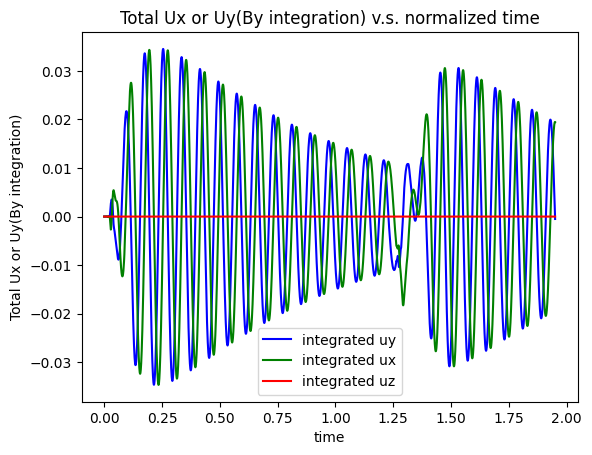

4000


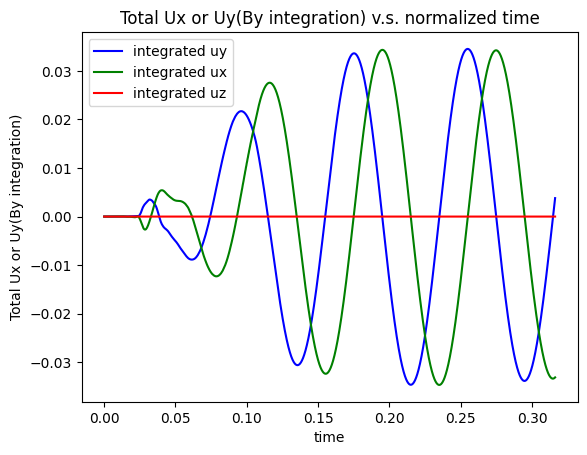

<Figure size 640x480 with 0 Axes>

In [17]:
print(len(all_tot_uy))
figure_x_axis = np.array([(x*nu/(2**2)) for x in range(1, len(all_tot_uy)+1)])
print(len(figure_x_axis))
plt.plot(figure_x_axis, all_tot_uy, color = 'blue', label='integrated uy')
plt.plot(figure_x_axis, all_tot_ux, color = 'green', label='integrated ux')
plt.plot(figure_x_axis, all_tot_uz, color = 'red', label='integrated uz')
plt.xlabel('time')
plt.ylabel('Total Ux or Uy(By integration)')
plt.title('Total Ux or Uy(By integration) v.s. normalized time')
plt.legend()
plt.show()
plt.clf()

"""
I suspect that, because it is integrated, then total uz is always 0
"""
print(len(all_tot_uy[:4000]))
plt.plot(figure_x_axis[:4000], all_tot_uy[:4000], color = 'blue', label='integrated uy')
plt.plot(figure_x_axis[:4000], all_tot_ux[:4000], color = 'green', label='integrated ux')
plt.plot(figure_x_axis[:4000], all_tot_uz[:4000], color = 'red', label='integrated uz')
plt.xlabel('time')
plt.ylabel('Total Ux or Uy(By integration)')
plt.title('Total Ux or Uy(By integration) v.s. normalized time')
plt.legend()
plt.show()
plt.clf()

In [18]:
all_tot_uy2 = []
for file in file_paths:
    with h5py.File(file, mode='r') as file:
        uy2 = file['tasks']['ke by uy']
        st = file['scales/sim_time']
        simtime = np.array(st)
        for t in range(0, len(simtime)):
            uy2_each = uy2[t][0][0]
            all_tot_uy2.append(uy2_each)
print(all_tot_uy2[3])
all_tot_ux2 = []
for file in file_paths:
    with h5py.File(file, mode='r') as file:
        ux2 = file['tasks']['ke by ux']
        st = file['scales/sim_time']
        simtime = np.array(st)
        for t in range(0, len(simtime)):
            ux2_each = ux2[t][0][0]
            all_tot_ux2.append(ux2_each)
print(all_tot_ux2[3])
all_tot_uz2 = []
for file in file_paths:
    with h5py.File(file, mode='r') as file:
        uz2 = file['tasks']['ke by uz']
        st = file['scales/sim_time']
        simtime = np.array(st)
        for t in range(0, len(simtime)):
            uz2_each = uz2[t][0][0]
            all_tot_uz2.append(uz2_each)
print(all_tot_uz2[3])

2.009091998712916e-14
3.436484231050826e-10
1.0366818534277264e-09


24662
24662


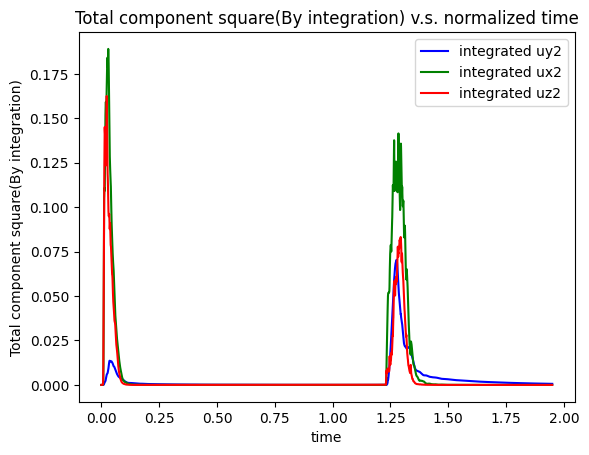

In [19]:
print(len(all_tot_uy2))
figure_x_axis = np.array([(x*nu/(2**2)) for x in range(1, len(all_tot_uy2)+1)])
print(len(figure_x_axis))
plt.plot(figure_x_axis, all_tot_uy2, color = 'blue', label='integrated uy2')
plt.plot(figure_x_axis, all_tot_ux2, color = 'green', label='integrated ux2')
plt.plot(figure_x_axis, all_tot_uz2, color = 'red', label='integrated uz2')
plt.xlabel('time')
plt.ylabel('Total component square(By integration)')
plt.title('Total component square(By integration) v.s. normalized time')
plt.legend()
plt.show()